In [2]:
import metric
import util.action_classification.clip_classif
from transformers import CLIPImageProcessor, CLIPVisionModel
from PIL import Image
import numpy as np

In [3]:
def image_grid(imgs, rows, cols):

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
model = CLIPVisionModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPImageProcessor.from_pretrained("openai/clip-vit-base-patch32")

Some weights of the model checkpoint at openai/clip-vit-base-patch32 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.1.self_attn.k_proj.bias', 'text_model.encoder.layers.5.layer_norm2.weight', 'text_model.encoder.layers.8.mlp.fc1.bias', 'text_model.encoder.layers.6.self_attn.q_proj.weight', 'text_model.encoder.layers.3.self_attn.q_proj.bias', 'text_model.encoder.layers.5.self_attn.q_proj.bias', 'text_model.encoder.layers.2.layer_norm2.bias', 'text_model.encoder.layers.4.self_attn.out_proj.weight', 'text_model.encoder.layers.2.layer_norm1.bias', 'text_model.encoder.layers.4.layer_norm1.weight', 'text_model.encoder.layers.8.mlp.fc2.weight', 'text_model.encoder.layers.4.mlp.fc1.weight', 'text_model.encoder.layers.10.layer_norm1.bias', 'text_model.encoder.layers.11.layer_norm1.weight', 'text_model.encoder.layers.9.self_attn.out_proj.bias', 'text_model.encoder.layers.3.mlp.fc1.bias', 'text_model.encoder.layers.0.mlp.fc1.bias', 'text_model.encoder.layers.10.layer

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

In [6]:
metric.deep_sim_metric('good_scenes', model, processor)

({'l2': [tensor(15.2208),
   tensor(14.4332),
   tensor(15.6962),
   tensor(12.7754),
   tensor(14.0010),
   tensor(14.3438)],
  'sim': [tensor(0.8328),
   tensor(0.8508),
   tensor(0.8373),
   tensor(0.8929),
   tensor(0.8714),
   tensor(0.8609)]},
 {'pixel_values': [array([[[-0.49300256, -0.5221994 , -0.55139625, ..., -0.6681836 ,
          -0.7703726 ,  0.68947   ],
         [-0.55139625, -0.5221994 , -0.50760096, ..., -0.6681836 ,
          -0.7703726 ,  0.7040684 ],
         [-0.5659947 , -0.55139625, -0.5367978 , ..., -0.6389868 ,
          -0.7411758 ,  0.7040684 ],
         ...,
         [ 1.8427455 ,  1.8427455 ,  1.8719424 , ...,  1.7405566 ,
           1.7551551 ,  1.8427455 ],
         [ 1.8865409 ,  1.8719424 ,  1.8719424 , ...,  1.7259582 ,
           1.7405566 ,  1.8427455 ],
         [ 1.8719424 ,  1.8865409 ,  1.8719424 , ...,  1.7259582 ,
           1.7259582 ,  1.8281472 ]],
 
        [[ 1.1444021 ,  1.0993788 ,  1.0543556 , ...,  0.79922354,
           0.7241847 ,  

In [7]:
metric.deep_sim_metric('bad_scenes', model, processor)

({'l2': [tensor(28.9309),
   tensor(28.4574),
   tensor(29.4848),
   tensor(28.3389),
   tensor(18.0069),
   tensor(29.6121)],
  'sim': [tensor(0.4151),
   tensor(0.4505),
   tensor(0.4335),
   tensor(0.4491),
   tensor(0.7845),
   tensor(0.3941)]},
 {'pixel_values': [array([[[0.41209993, 0.41209993, 0.41209993, ..., 0.41209993,
          0.41209993, 0.41209993],
         [0.4704936 , 0.4704936 , 0.4704936 , ..., 0.4704936 ,
          0.4704936 , 0.4704936 ],
         [0.5142889 , 0.5142889 , 0.5142889 , ..., 0.5142889 ,
          0.5142889 , 0.5142889 ],
         ...,
         [0.9084464 , 0.9084464 , 0.9084464 , ..., 0.9084464 ,
          0.9084464 , 0.9084464 ],
         [0.9084464 , 0.9084464 , 0.9084464 , ..., 0.9084464 ,
          0.9084464 , 0.9084464 ],
         [0.89384794, 0.89384794, 0.89384794, ..., 0.89384794,
          0.89384794, 0.89384794]],
 
        [[0.964309  , 0.964309  , 0.964309  , ..., 0.964309  ,
          0.964309  , 0.964309  ],
         [1.02434   , 1.02434

In [13]:
scores, imgs = metric.deep_sim_metric('good_scenes', model, processor)

In [39]:
pil_images = [Image.fromarray(np.uint8(i.transpose(1,2,0) * 255)) for i in imgs]

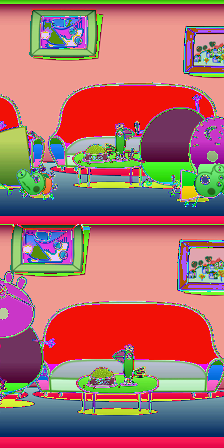

In [41]:
grid = image_grid(pil_images, 2, 1)
grid